In [ ]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision import datasets


In [ ]:
# Download MNIST dataset
def load_data(train_batch_size, test_batch_size):
    common_transform = transforms.Compose([
        transforms.Resize((32, 32)),
        transforms.ToTensor()
    ])

    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=True, download=True, transform=common_transform),
        batch_size=train_batch_size, shuffle=True
    )

    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train=False, transform=common_transform),
        batch_size=test_batch_size, shuffle=True
    )

    return train_loader, test_loader


In [ ]:
class Model_1(nn.Module):
    def __init__(self):
        super(Model_1, self).__init__()

        self.c1 = nn.Conv2d(1, 6, 5)
        self.c2 = nn.Conv2d(6, 16, 5)
        self.l1 = nn.Linear(16 * 5 * 5, 120)
        self.l2 = nn.Linear(120, 84)
        self.l3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.c1(x)), 2)
        x = F.max_pool2d(F.relu(self.c2(x)), 2)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))
        x = self.l3(x)

        return x

In [ ]:
def train_model(model, loss_func, epoch, data, optimizer):
    running_loss = 0
    sizes_sample = 0
    true_predictions = 0
    cumulative_loss = 0
    i = 0

    for batch_idx, (x, target) in enumerate(data):
        i += 1
        optimizer.zero_grad()
        x, expected_out = Variable(x), Variable(target)
        output = model(x)
        loss = loss_func(output, expected_out)
        loss.backward()
        optimizer.step()
        predicted_output = np.argmax(output.data, axis=1)

        sizes_sample = sizes_sample + target.size(0)
        true_predictions = true_predictions + (predicted_output == expected_out).sum().item()
        accuracy = 100.0 * true_predictions / sizes_sample
        cumulative_loss = cumulative_loss + loss.data

        if (batch_idx + 1) % 150 == 0 or (batch_idx + 1) == len(data):
            print('Epoch: {}, accuracy: {}, train loss: {:.6f}'.format(
                epoch, round(accuracy, 2), loss.data))

    running_loss = cumulative_loss / i
    return running_loss, round(accuracy, 2)


In [10]:
train_data, test_data = load_data(64, 1000)
model = Model_1()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_func = nn.CrossEntropyLoss()
loss_arr = []
accuracy_arr = []

for epoch in range(1, 10):
    loss, accuracy = train_model(model, loss_func, epoch, train_data, optimizer)
    loss_arr.append(loss)
    accuracy_arr.append(accuracy)

Epoch: 1, accuracy: 38.71, train loss: 0.588681
Epoch: 1, accuracy: 63.4, train loss: 0.249831
Epoch: 1, accuracy: 73.17, train loss: 0.119204
Epoch: 1, accuracy: 78.67, train loss: 0.091855
Epoch: 1, accuracy: 82.11, train loss: 0.269969
Epoch: 1, accuracy: 84.48, train loss: 0.220623
Epoch: 1, accuracy: 84.95, train loss: 0.382179
Epoch: 2, accuracy: 97.15, train loss: 0.247784
Epoch: 2, accuracy: 97.07, train loss: 0.075277
Epoch: 2, accuracy: 97.05, train loss: 0.123232
Epoch: 2, accuracy: 97.17, train loss: 0.052959
Epoch: 2, accuracy: 97.27, train loss: 0.047144
Epoch: 2, accuracy: 97.27, train loss: 0.136026
Epoch: 2, accuracy: 97.3, train loss: 0.013054
Epoch: 3, accuracy: 98.26, train loss: 0.061720
Epoch: 3, accuracy: 98.15, train loss: 0.030347
Epoch: 3, accuracy: 98.05, train loss: 0.175718
Epoch: 3, accuracy: 98.09, train loss: 0.211341
Epoch: 3, accuracy: 98.16, train loss: 0.190790
Epoch: 3, accuracy: 98.16, train loss: 0.031052
Epoch: 3, accuracy: 98.17, train loss: 0.0

<h3> Accuracy Plot <h3>

In [ ]:
class Model_2(nn.Module):
    def __init__(self):
        super(Model_2, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.conv2 = nn.Conv2d(32, 64, 5)
        self.conv3 = nn.Conv2d(64, 64, 5)
        self.fc1 = nn.Linear(1024, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(F.max_pool2d(self.conv2(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = F.relu(F.max_pool2d(self.conv3(x), 2))
        x = F.dropout(x, p=0.5, training=self.training)
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [ ]:
train_data, test_data = load_data(64, 1000)
model = Model_2()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_func = nn.CrossEntropyLoss()
loss_arr_2 = []
accuracy_arr_2 = []

for epoch in range(1, 11):
    print('New epoch')
    loss, accuracy = train_model(model, loss_func, epoch, train_data, optimizer)
    loss_arr_2.append(loss)
    accuracy_arr_2.append(accuracy)

New epoch
Epoch: 1, accuracy: 49.06, train loss: 0.478246
Epoch: 1, accuracy: 68.3, train loss: 0.211650
Epoch: 1, accuracy: 76.14, train loss: 0.128162
Epoch: 1, accuracy: 80.47, train loss: 0.158658
Epoch: 1, accuracy: 83.3, train loss: 0.118484
Epoch: 1, accuracy: 85.27, train loss: 0.057118
Epoch: 1, accuracy: 85.68, train loss: 0.086544
New epoch
Epoch: 2, accuracy: 95.59, train loss: 0.083855
Epoch: 2, accuracy: 95.92, train loss: 0.063563
Epoch: 2, accuracy: 95.95, train loss: 0.048727
Epoch: 2, accuracy: 96.1, train loss: 0.067250
Epoch: 2, accuracy: 96.22, train loss: 0.048776
Epoch: 2, accuracy: 96.36, train loss: 0.039079
Epoch: 2, accuracy: 96.36, train loss: 0.232617
New epoch
Epoch: 3, accuracy: 97.16, train loss: 0.096931
Epoch: 3, accuracy: 97.26, train loss: 0.128446
Epoch: 3, accuracy: 97.24, train loss: 0.129774
Epoch: 3, accuracy: 97.23, train loss: 0.046015
Epoch: 3, accuracy: 97.27, train loss: 0.050696
Epoch: 3, accuracy: 97.29, train loss: 0.032946
Epoch: 3, acc

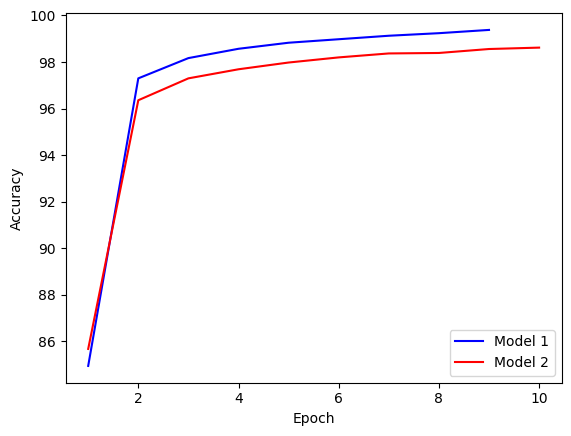

In [12]:
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(np.arange(1,10,1), accuracy_arr, color = "blue")
plt.plot(np.arange(1,11,1), accuracy_arr_2, color = "red")
plt.legend(['Model 1', 'Model 2'])
plt.show()

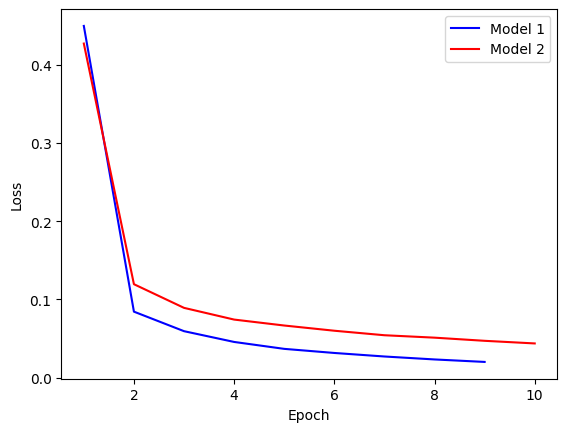

In [14]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(np.arange(1,10,1), loss_arr, color = "blue")
plt.plot(np.arange(1,11,1), loss_arr_2, color = "red")
plt.legend(['Model 1', 'Model 2'])
plt.show()